In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
# https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook#Business-Goal

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set()

from sklearn.cluster import KMeans

In [ ]:
# Google Colab 
df = pd.read_csv('drive/My Drive/Dataset/Gridstore/gridstore_clean.csv')

# Local
# df = pd.read_csv('./gridstore_clean.csv')

df.head()

,Unnamed: 0,trans_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,0,2021-03-29 12:52:37,TRANS-1616997157-20565,d819357da6,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800
1,1,2021-03-31 11:20:36,TRANS-1617164436-20596,eeb8b45a7e,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800
2,2,2021-04-28 17:02:23,TRANS-1619604143-21017,37e08601bf,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000
3,3,2021-06-05 06:11:53,TRANS-1622848313-21446,2ee7184bc3,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000
4,4,2021-07-30 04:05:39,TRANS-1627592739-22507,ee92ea9ffe,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800


In [ ]:
df.describe()

,Unnamed: 0,quantity,sub_total
count,5777.000000,5777.000000,5.777000e+03
mean,2888.000000,1.006059,2.731204e+05
std,1667.820584,0.110705,2.075539e+05
min,0.000000,1.000000,2.400000e+03
25%,1444.000000,1.000000,1.456000e+05
50%,2888.000000,1.000000,2.275000e+05
75%,4332.000000,1.000000,3.640000e+05
max,5776.000000,5.000000,1.768000e+06


In [ ]:
df.shape

(5777, 8)

In [ ]:
df.duplicated().value_counts()

False    5777
dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0      0
trans_date      0
trans_id        0
user_id         0
brand           0
product_name    0
quantity        0
sub_total       0
dtype: int64

In [ ]:
df_rfm = df.copy()

df_rfm.drop(columns=['Unnamed: 0'], inplace=True)

df_rfm.head()

,trans_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,2021-03-29 12:52:37,TRANS-1616997157-20565,d819357da6,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800
1,2021-03-31 11:20:36,TRANS-1617164436-20596,eeb8b45a7e,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800
2,2021-04-28 17:02:23,TRANS-1619604143-21017,37e08601bf,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000
3,2021-06-05 06:11:53,TRANS-1622848313-21446,2ee7184bc3,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000
4,2021-07-30 04:05:39,TRANS-1627592739-22507,ee92ea9ffe,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800


In [ ]:
df_rfm.dtypes

trans_date      object
trans_id        object
user_id         object
brand           object
product_name    object
quantity         int64
sub_total        int64
dtype: object

In [ ]:
df_rfm['trans_date'] = pd.to_datetime(df_rfm['trans_date'])

df_rfm.dtypes

trans_date      datetime64[ns]
trans_id                object
user_id                 object
brand                   object
product_name            object
quantity                 int64
sub_total                int64
dtype: object

In [ ]:
monetary = df_rfm.groupby('user_id').sum()['sub_total'].reset_index()

monetary.sort_values('sub_total', ascending=False).head()

<ipython-input-13-b2fab032ef56>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monetary = df_rfm.groupby('user_id').sum()['sub_total'].reset_index()


,user_id,sub_total
1677,6fce2e62f1,6194800
2501,a53b8e9d56,5701150
2907,c1011b48a1,4466400
3767,f7152e469d,4457800
2911,c1426fa837,4125200


In [ ]:
frequency = df_rfm.groupby('user_id')['trans_id'].count().reset_index()

frequency.sort_values('trans_id', ascending=False).head()

,user_id,trans_id
1868,7a8310aa9f,14
1677,6fce2e62f1,13
2501,a53b8e9d56,12
1965,808053cdd1,12
3629,ee40bf926b,10


In [ ]:
max_date = max(df_rfm['trans_date'])

In [ ]:
df_rfm['diff_date'] = max_date - df_rfm['trans_date']

df_rfm.head()

,trans_date,trans_id,user_id,brand,product_name,quantity,sub_total,diff_date
0,2021-03-29 12:52:37,TRANS-1616997157-20565,d819357da6,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800,701 days 09:49:47
1,2021-03-31 11:20:36,TRANS-1617164436-20596,eeb8b45a7e,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800,699 days 11:21:48
2,2021-04-28 17:02:23,TRANS-1619604143-21017,37e08601bf,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000,671 days 05:40:01
3,2021-06-05 06:11:53,TRANS-1622848313-21446,2ee7184bc3,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000,633 days 16:30:31
4,2021-07-30 04:05:39,TRANS-1627592739-22507,ee92ea9ffe,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800,578 days 18:36:45


In [ ]:
recency = df_rfm.groupby('user_id')['diff_date'].min().reset_index()

recency['diff_date'] = recency['diff_date'].dt.days

recency.head()

,user_id,diff_date
0,001b5eddf7,447
1,0023cedbf9,489
2,0024ae4898,587
3,002d8b5849,137
4,003e99a26e,711


In [ ]:
df_rfm = pd.merge(monetary, frequency, on='user_id', how='inner')
df_rfm = pd.merge(df_rfm, recency, on='user_id', how='inner')

df_rfm = df_rfm.rename(columns={'sub_total': 'amount', 'trans_id': 'frequency', 'diff_date': 'recency'})

df_rfm.head()

,user_id,amount,frequency,recency
0,001b5eddf7,591500,2,447
1,0023cedbf9,7000,1,489
2,0024ae4898,436800,2,587
3,002d8b5849,204750,1,137
4,003e99a26e,145600,1,711


In [ ]:
df_rfm.shape

(3900, 4)

In [ ]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_rfm[['amount', 'frequency', 'recency']])

df_scaled

array([[ 0.43925022,  0.50470114,  0.34318529],
       [-0.93420275, -0.46827683,  0.54733465],
       [ 0.07573752,  0.50470114,  1.02368315],
       ...,
       [ 0.75999672, -0.46827683, -0.99350693],
       [-0.88485713, -0.46827683,  0.70287701],
       [-0.09532728, -0.46827683,  0.00779706]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['amount', 'frequency', 'recency']

df_scaled.head()

,amount,frequency,recency
0,0.439250,0.504701,0.343185
1,-0.934203,-0.468277,0.547335
2,0.075738,0.504701,1.023683
3,-0.469532,-0.468277,-1.163631
4,-0.608522,-0.468277,1.626410


In [ ]:
df_scaled['user_id'] = df_rfm['user_id']

df_scaled.head()

,amount,frequency,recency,user_id
0,0.439250,0.504701,0.343185,001b5eddf7
1,-0.934203,-0.468277,0.547335,0023cedbf9
2,0.075738,0.504701,1.023683,0024ae4898
3,-0.469532,-0.468277,-1.163631,002d8b5849
4,-0.608522,-0.468277,1.626410,003e99a26e


In [ ]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['amount', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.519085,0.543049
1,-1.117199,0.203529
2,0.053375,1.109679
3,-0.247901,-1.315656
4,-1.250074,1.291808


In [ ]:
inertia = []
score = []

for k in range(2, 10):
  km = KMeans(n_clusters=k)
  km.fit(df_pca)

  ss = silhouette_score(df_pca, km.labels_)

  score.append(ss)

  inertia.append(km.inertia_)

print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.5334847808820227, 0.46078103621891386, 0.47602996430925476, 0.465088466422855, 0.39440138095331234, 0.4240951663886163, 0.42489326683297174, 0.4245473623545554]


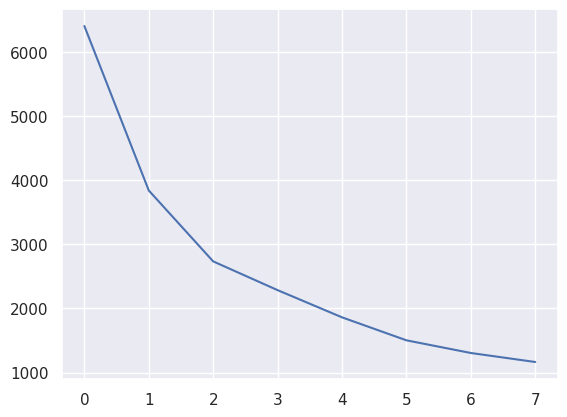

In [ ]:
plt.plot(inertia)

In [ ]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['amount', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.519085,0.543049
1,-1.117199,0.203529
2,0.053375,1.109679
3,-0.247901,-1.315656
4,-1.250074,1.291808


<Axes: xlabel='pca1', ylabel='pca2'>

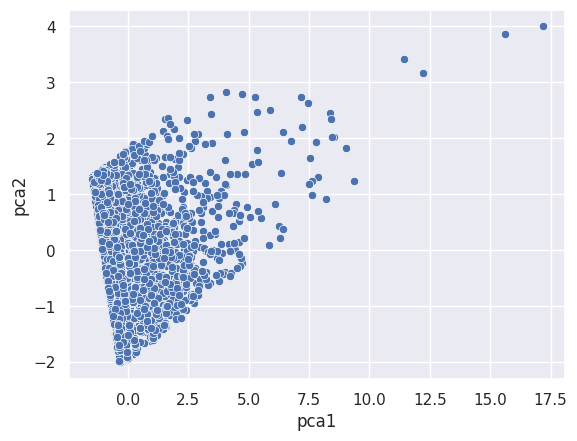

In [ ]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2')

In [ ]:
km = KMeans(n_clusters=4)
km.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
centroid = km.cluster_centers_

centroid

array([[ 5.76994315,  1.21381155],
       [-0.15520218, -1.00082499],
       [-0.69772425,  0.68355447],
       [ 1.60688431, -0.00844791]])

In [ ]:
df_pca.head()

,pca1,pca2
0,0.519085,0.543049
1,-1.117199,0.203529
2,0.053375,1.109679
3,-0.247901,-1.315656
4,-1.250074,1.291808


<Axes: xlabel='pca1', ylabel='pca2'>

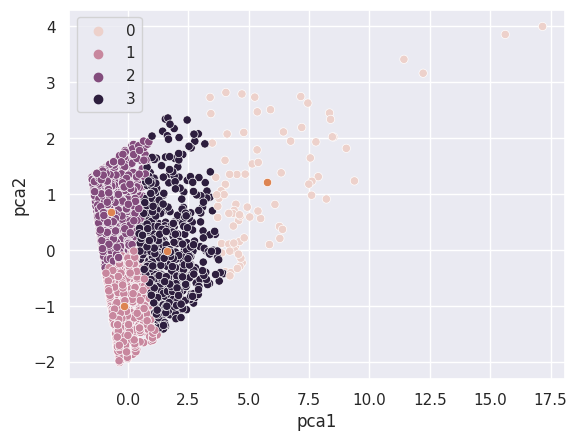

In [ ]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue=km.labels_)
sns.scatterplot(x=centroid[:,0], y=centroid[:,1], markers='x', sizes=2)

In [ ]:
df_rfm['label'] = km.labels_

df_rfm.head()

,user_id,amount,frequency,recency,label
0,001b5eddf7,591500,2,447,3
1,0023cedbf9,7000,1,489,2
2,0024ae4898,436800,2,587,2
3,002d8b5849,204750,1,137,1
4,003e99a26e,145600,1,711,2


<Axes: xlabel='label', ylabel='amount'>

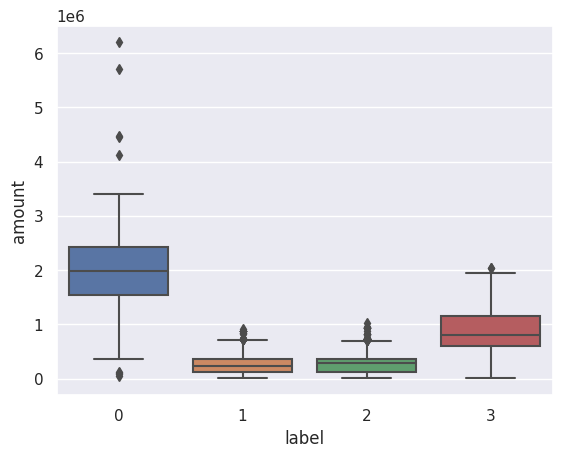

In [ ]:
sns.boxplot(data=df_rfm, x='label', y='amount')

<Axes: xlabel='label', ylabel='frequency'>

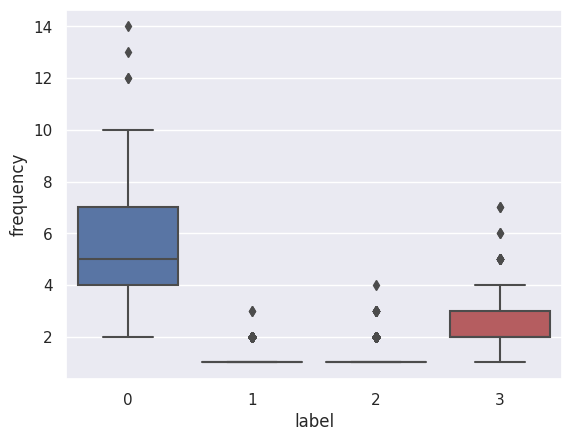

In [ ]:
sns.boxplot(data=df_rfm, x='label', y='frequency')

<Axes: xlabel='label', ylabel='recency'>

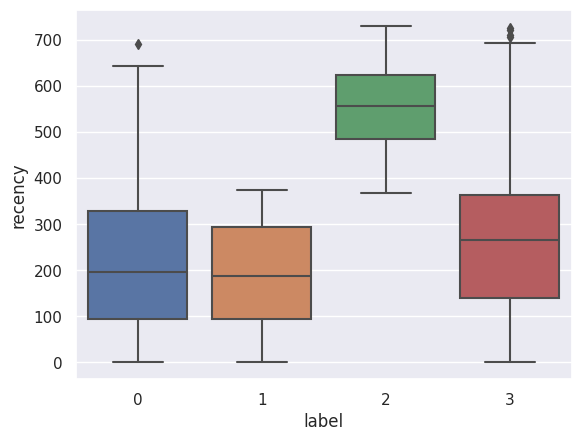

In [ ]:
sns.boxplot(data=df_rfm, x='label', y='recency')

In [ ]:
df_rfm['label'].value_counts()

2    1837
1    1350
3     630
0      83
Name: label, dtype: int64

In [ ]:
df_rfm[df_rfm['label'] == 0].describe()

,amount,frequency,recency,label
count,8.300000e+01,83.000000,83.000000,83.0
mean,2.093807e+06,5.903614,224.409639,0.0
std,1.040146e+06,2.345803,167.560112,0.0
min,5.600000e+04,2.000000,2.000000,0.0
25%,1.546300e+06,4.000000,95.000000,0.0
50%,1.981600e+06,5.000000,197.000000,0.0
75%,2.421075e+06,7.000000,329.500000,0.0
max,6.194800e+06,14.000000,691.000000,0.0


In [ ]:
df_rfm[df_rfm['label'] == 1].describe()

,amount,frequency,recency,label
count,1350.000000,1350.000000,1350.000000,1350.0
mean,266848.448148,1.126667,192.140000,1.0
std,185393.993295,0.337149,110.079096,0.0
min,6500.000000,1.000000,0.000000,1.0
25%,122437.500000,1.000000,94.000000,1.0
50%,227500.000000,1.000000,186.500000,1.0
75%,364000.000000,1.000000,293.000000,1.0
max,910000.000000,3.000000,374.000000,1.0


In [ ]:
df_rfm[df_rfm['label'] == 2].describe()

,amount,frequency,recency,label
count,1.837000e+03,1837.000000,1837.000000,1837.0
mean,2.719284e+05,1.166576,556.160588,2.0
std,1.930780e+05,0.396765,94.005353,0.0
min,2.400000e+03,1.000000,368.000000,2.0
25%,1.275000e+05,1.000000,485.000000,2.0
50%,2.870000e+05,1.000000,557.000000,2.0
75%,3.640000e+05,1.000000,623.000000,2.0
max,1.028000e+06,4.000000,729.000000,2.0


In [ ]:
df_rfm[df_rfm['label'] == 3].describe()

,amount,frequency,recency,label
count,6.300000e+02,630.000000,630.000000,630.0
mean,8.638935e+05,2.576190,267.082540,3.0
std,3.455745e+05,0.887865,157.255434,0.0
min,1.344000e+04,1.000000,0.000000,3.0
25%,6.040125e+05,2.000000,140.000000,3.0
50%,8.060000e+05,2.000000,266.500000,3.0
75%,1.147920e+06,3.000000,362.750000,3.0
max,2.040000e+06,7.000000,726.000000,3.0


In [ ]:
df_label = df_rfm[['user_id', 'label']]

df_label.head()

,user_id,label
0,001b5eddf7,3
1,0023cedbf9,2
2,0024ae4898,2
3,002d8b5849,1
4,003e99a26e,2


In [ ]:
df = df.merge(df_label, how='inner', on='user_id')

df.head(100)

,Unnamed: 0,trans_date,trans_id,user_id,brand,product_name,quantity,sub_total,label_x,label_y,label_x,label_y,label
0,0,2021-03-29 12:52:37,TRANS-1616997157-20565,d819357da6,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800,2,2,2,2,2
1,1,2021-03-31 11:20:36,TRANS-1617164436-20596,eeb8b45a7e,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,176800,2,2,2,2,2
2,535,2021-03-31 11:20:36,TRANS-1617164436-20596,eeb8b45a7e,Kindergarten Creativity Magazine,Kindergarten Creativity Magazine 12 Month Prin...,1,168000,2,2,2,2,2
3,2,2021-04-28 17:02:23,TRANS-1619604143-21017,37e08601bf,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000,2,2,2,2,2
4,3,2021-06-05 06:11:53,TRANS-1622848313-21446,2ee7184bc3,Cooking Magazine,Cooking Magazine 6 Month Printed Subscription,1,221000,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,84,2021-10-18 08:21:15,TRANS-1634520075-26352,ee942bec92,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,150000,3,3,3,3,3
96,129,2022-04-15 09:10:30,TRANS-1649988630-28594,ee942bec92,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000,3,3,3,3,3
97,156,2022-10-28 18:57:49,TRANS-1666958269-30275,ee942bec92,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,135000,3,3,3,3,3
98,43,2021-04-12 14:50:28,TRANS-1618213828-20818,f202b4f16e,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,150000,2,2,2,2,2


In [ ]:
df['label'].value_counts()

2    2143
3    1623
1    1521
0     490
Name: label, dtype: int64